# Imports

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import sys
from math import atan, exp
from pprint import pprint
import numpy as np
from scipy.interpolate import CubicSpline
from scipy import interpolate
import bisect

# Initialization

In [ ]:
style_url = r"https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle"
matplotlib.style.use(style_url)

# Functions

In [ ]:
def f(x):
  return 5*x**5 + 3*x**3 - 4*x**2 - 9*x + 100

def compute_changes(x):
    return [x[i+1] - x[i] for i in range(len(x) - 1)]


def create_tridiagonalmatrix(n, h):
    A = [h[i] / (h[i] + h[i + 1]) for i in range(n - 2)] + [0]
    B = [2] * n
    C = [0] + [h[i + 1] / (h[i] + h[i + 1]) for i in range(n - 2)]
    return A, B, C


def create_target(n, h, y):
    return [0] + [6 * ((y[i + 1] - y[i]) / h[i] - (y[i] - y[i - 1]) / h[i - 1]) / (h[i] + h[i-1]) for i in range(1, n - 1)] + [0]


def solve_tridiagonalsystem(A, B, C, D):
    c_p = C + [0]
    d_p = [0] * len(B)
    X = [0] * len(B)

    c_p[0] = C[0] / B[0]
    d_p[0] = D[0] / B[0]
    for i in range(1, len(B)):
        c_p[i] = c_p[i] / (B[i] - c_p[i - 1] * A[i - 1])
        d_p[i] = (D[i] - d_p[i - 1] * A[i - 1]) / \
            (B[i] - c_p[i - 1] * A[i - 1])

    X[-1] = d_p[-1]
    for i in range(len(B) - 2, -1, -1):
        X[i] = d_p[i] - c_p[i] * X[i + 1]

    return X


def compute_spline(x, y):
    n = len(x)
    if n < 3:
        raise ValueError('Too short an array')
    if n != len(y):
        raise ValueError('Array lengths are different')

    h = compute_changes(x)
    if any(v < 0 for v in h):
        raise ValueError('X must be strictly increasing')

    A, B, C = create_tridiagonalmatrix(n, h)
    D = create_target(n, h, y)
    M = solve_tridiagonalsystem(A, B, C, D)
    coefficients = [[(M[i+1]-M[i])*h[i]*h[i]/6, M[i]*h[i]*h[i]/2, (y[i+1] -
                                                                   y[i] - (M[i+1]+2*M[i])*h[i]*h[i]/6), y[i]] for i in range(n-1)]

    def spline(val):
        idx = min(bisect.bisect(x, val)-1, n-2)
        z = (val - x[idx]) / h[idx]
        C = coefficients[idx]
        return (((C[0] * z) + C[1]) * z + C[2]) * z + C[3]

    return spline


# Task

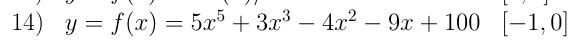

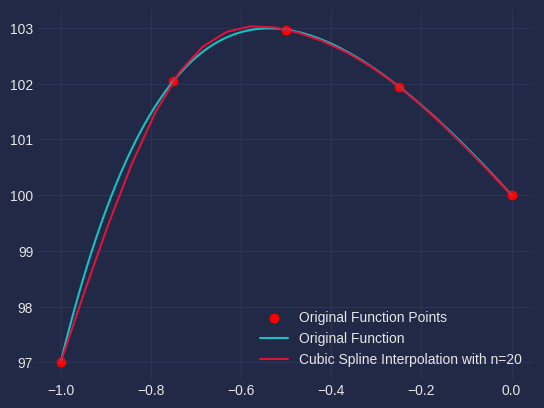

In [ ]:
n = 20

x = np.linspace(-1, 0, 5)
y = [f(xi) for xi in x]

spline = compute_spline(x, y)

x_vals = np.linspace(-1, 0, n)
y_vals = [spline(y) for y in x_vals]

xorig = np.linspace(-1, 0, 1000)
yorig = [f(xi) for xi in xorig]

fig = plt.figure()
plt.scatter(x, y, color='red', label='Original Function Points')
plt.plot(xorig, yorig, label='Original Function')
plt.plot(x_vals, y_vals, color='crimson', label=f'Cubic Spline Interpolation with n={n}')
plt.legend()